In [1]:
import os
# print(os.getcwd())

import pandas as pd
from src import analysis as an

In [2]:
# Constatns
pynq_1_data_path = r'data\raw\v2\pynq_1_data.csv'

lfsr_seed_col = 'LFSR_Seed_Value'
lfsr_temp_col = 'LFSR_Seed_Temperature'
lfsr_volt_col = 'LFSR_Seed_Vccint'
puf_response_col = 'PUF_Response_Value'
puf_temp_col = 'PUF_Response_Temperature'
puf_volt_col = 'PUF_Response_Vccint'

# Load the dataset
try:
    df = pd.read_csv(pynq_1_data_path, dtype=str)
    print("CSV file loaded successfully.")
except FileNotFoundError:
    print(f"Error: {pynq_1_data_path} not found. Please place it in the same directory.")
    exit()

CSV file loaded successfully.


In [3]:
# Optional csv preprocessing for analysis and plotting
df[puf_temp_col] = pd.to_numeric(df[puf_temp_col], errors='coerce')
df[puf_volt_col] = pd.to_numeric(df[puf_volt_col], errors='coerce')

# Drop rows where conversion failed, just in case
df.dropna(subset=[puf_temp_col, puf_volt_col], inplace=True)

# # Check the data types to confirm the change
# print("\nVerifying data types after conversion:")
# df.info()

### Analyze bit proportions

In [4]:
print('LFSR_Seed_Value:')
print(f"Zeroes: {an.analyze_bit_proportions(df, lfsr_seed_col)['zeroes_proportions']}")
print(f"Ones  : {an.analyze_bit_proportions(df, lfsr_seed_col)['ones_proportions']}")

print('')

print('PUF_Response_Value:')
print(f"Zeroes: {an.analyze_bit_proportions(df, puf_response_col)['zeroes_proportions']}")
print(f"Ones  : {an.analyze_bit_proportions(df, puf_response_col)['ones_proportions']}")


LFSR_Seed_Value:
Zeroes: 0.4444444444444444
Ones  : 0.5555555555555556

PUF_Response_Value:
Zeroes: 0.6506818181818181
Ones  : 0.3493181818181818


### Ideal values

In [5]:
df_ideal_lfsr_seed = an.get_ideal_value(df, lfsr_seed_col)
df_ideal_puf_response = an.get_ideal_value(df, puf_response_col)

print(f"LFSR_Seed_Value    : {df_ideal_lfsr_seed}")
print(f"PUF_Response_Value : {df_ideal_puf_response}")
print("2412 occurrences of the ideal PUF response.")

LFSR_Seed_Value    : 100011110
PUF_Response_Value : 11001010101111000100100101000000000100000101001100100000101100010110000111101000000101000000011100000000000110001100100001100011
2412 occurrences of the ideal PUF response.


### Analyze bit stability

In [6]:
lfsr_seed_bit_flips = an.get_formatted_stability(df, lfsr_seed_col, df_ideal_lfsr_seed)
puf_response_bit_flips = an.get_formatted_stability(df, puf_response_col, df_ideal_puf_response)

print(f"LFSR_Seed_Value\n{lfsr_seed_bit_flips.head()}\n")
print(f"PUF_Response_Value\n{puf_response_bit_flips.head()}")

LFSR_Seed_Value
Series([], dtype: float64)

PUF_Response_Value
3     0.497636
50    0.386273
59    0.251773
89    0.208955
1     0.139000
dtype: float64


### Data visualization

#### Bit proportions

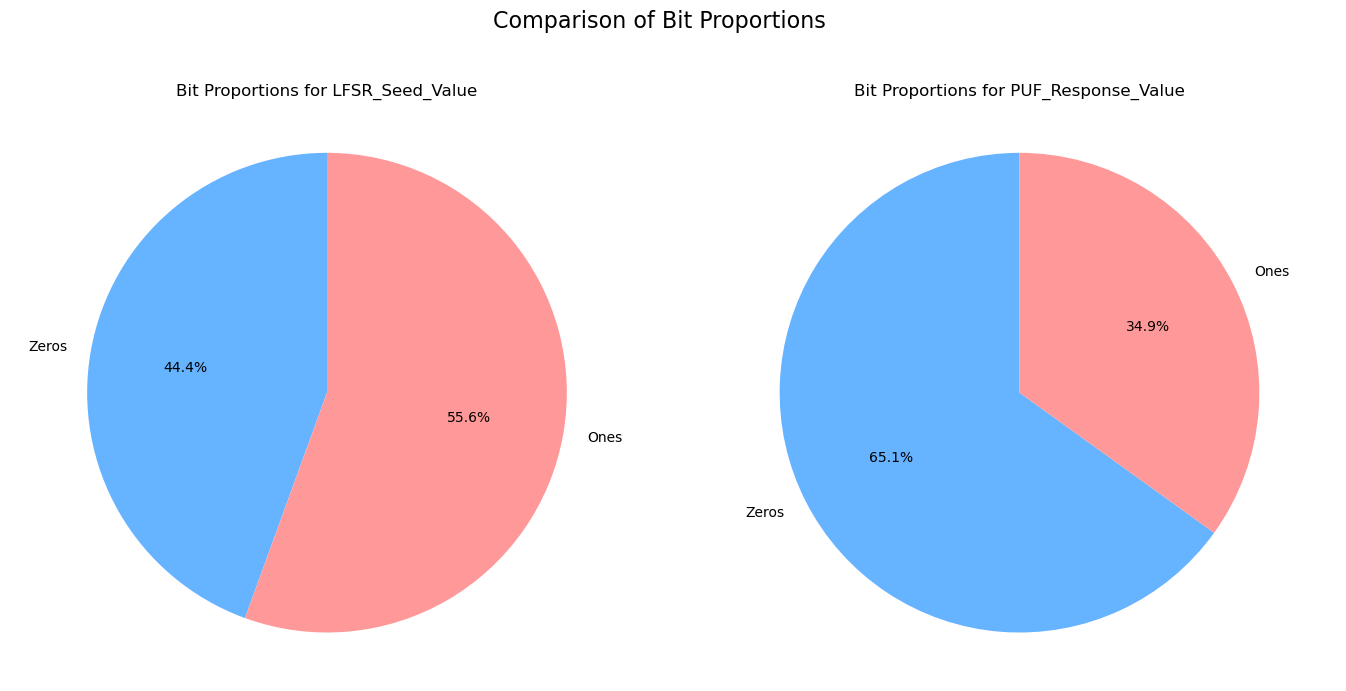

In [7]:
an.plot_dual_bit_proportions(df, lfsr_seed_col, puf_response_col, an.analyze_bit_proportions)

#### Stability heatmap

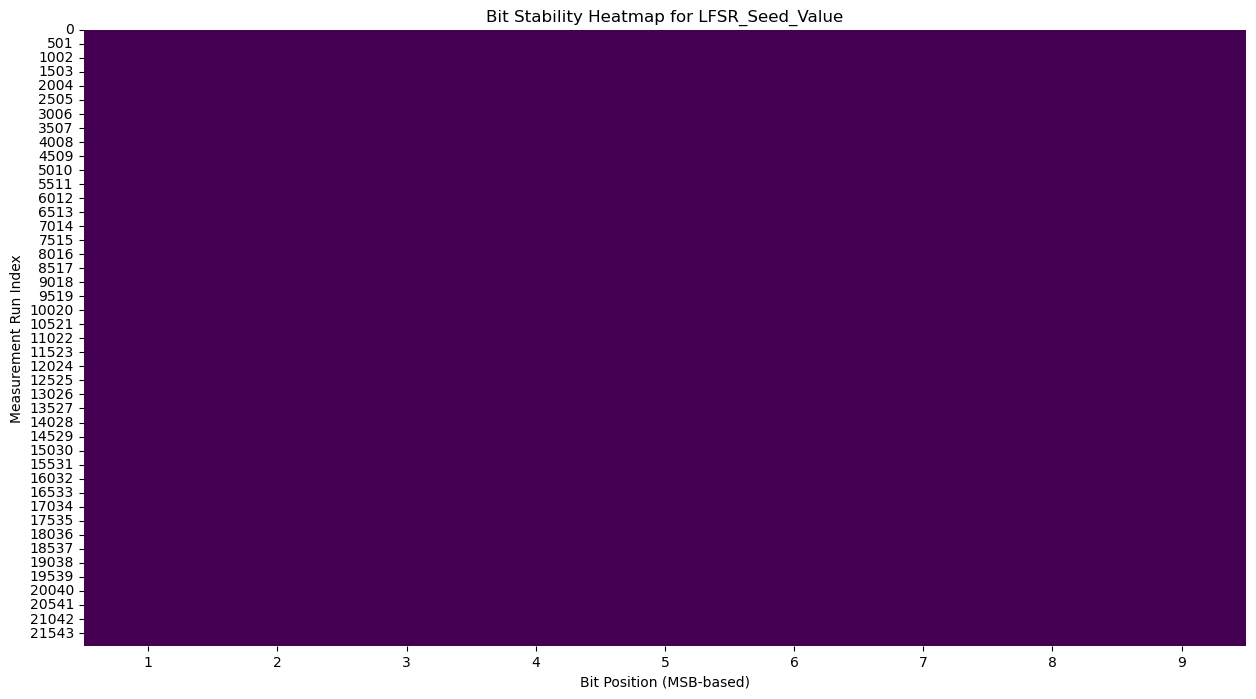

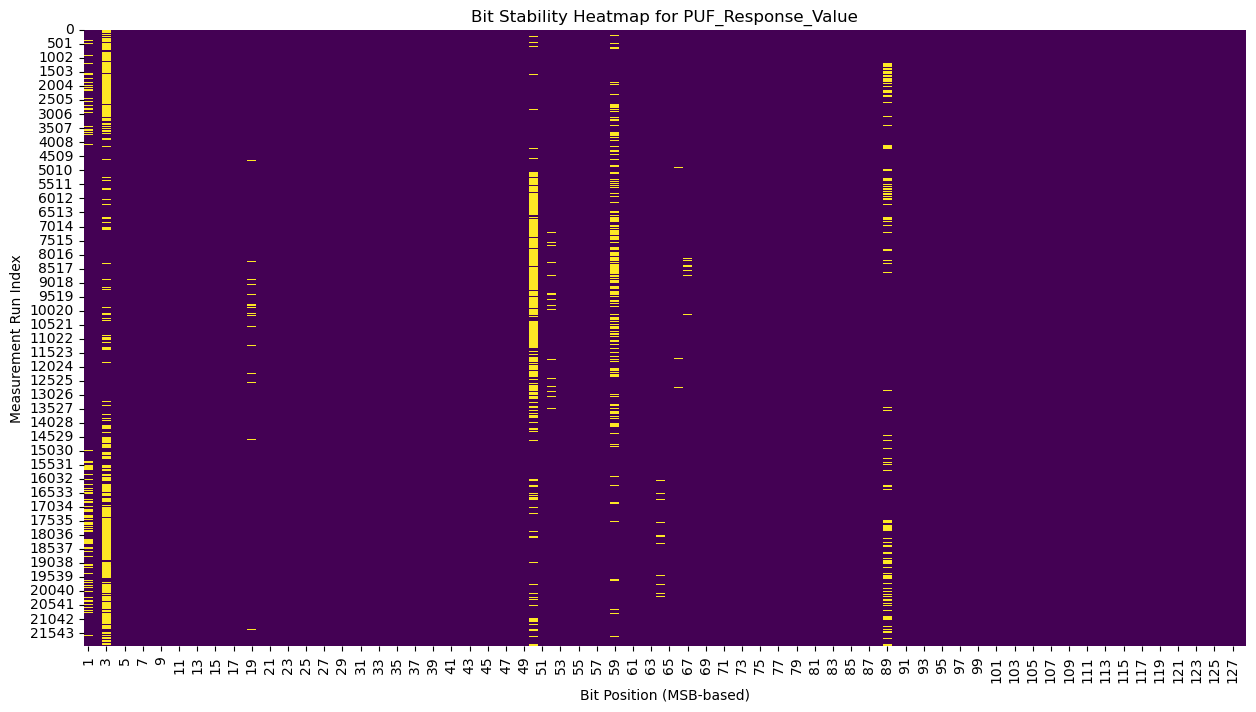

In [8]:
an.plot_stability_heatmap(df, lfsr_seed_col, df_ideal_lfsr_seed)
an.plot_stability_heatmap(df, puf_response_col, df_ideal_puf_response)

#### Inter hamming distribution

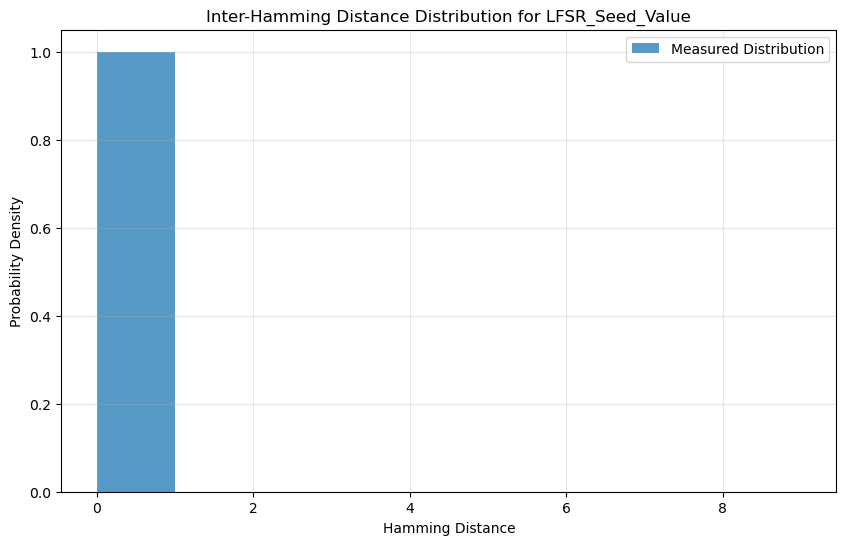

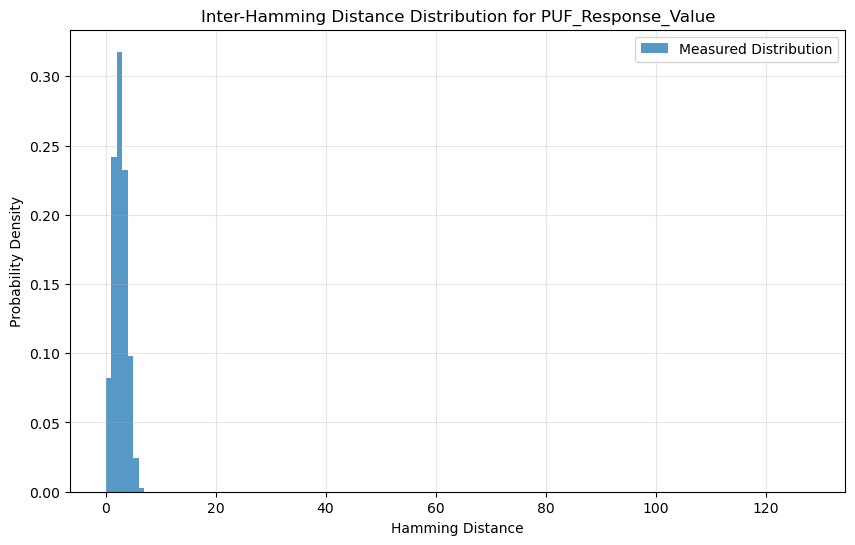

In [9]:
an.plot_inter_hamming_distribution(df, lfsr_seed_col, 22000)
an.plot_inter_hamming_distribution(df, puf_response_col, 22000)

#### Temperature plot

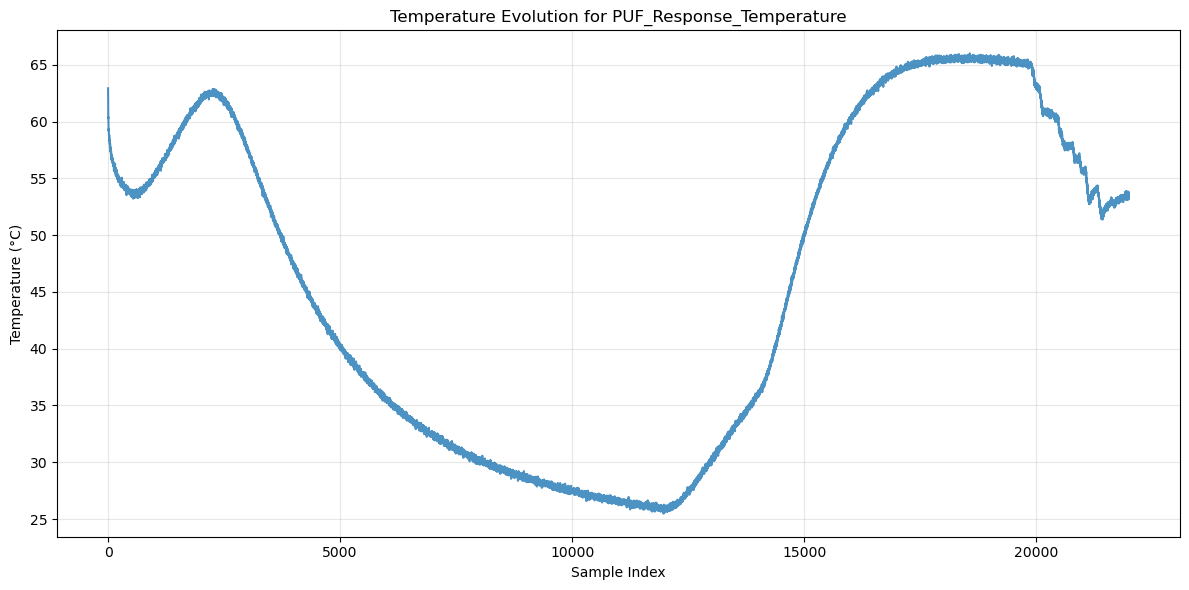

In [10]:
an.temperature_plot(df, puf_temp_col)

#### Voltage plot

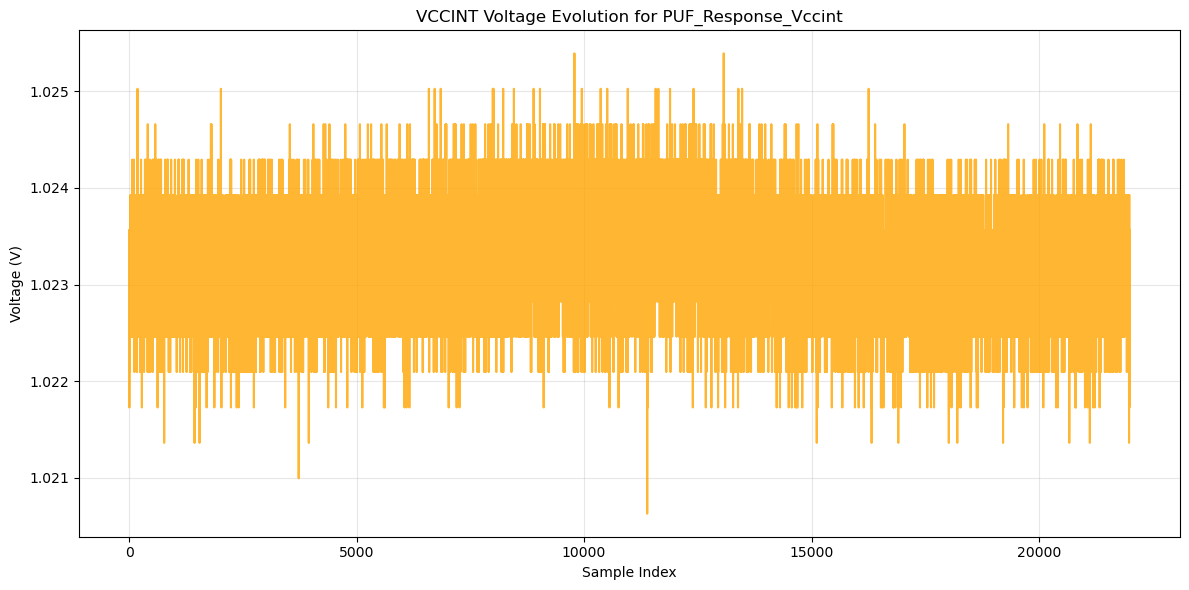

In [11]:
an.voltage_plot(df, puf_volt_col)

#### Unstable bit flips

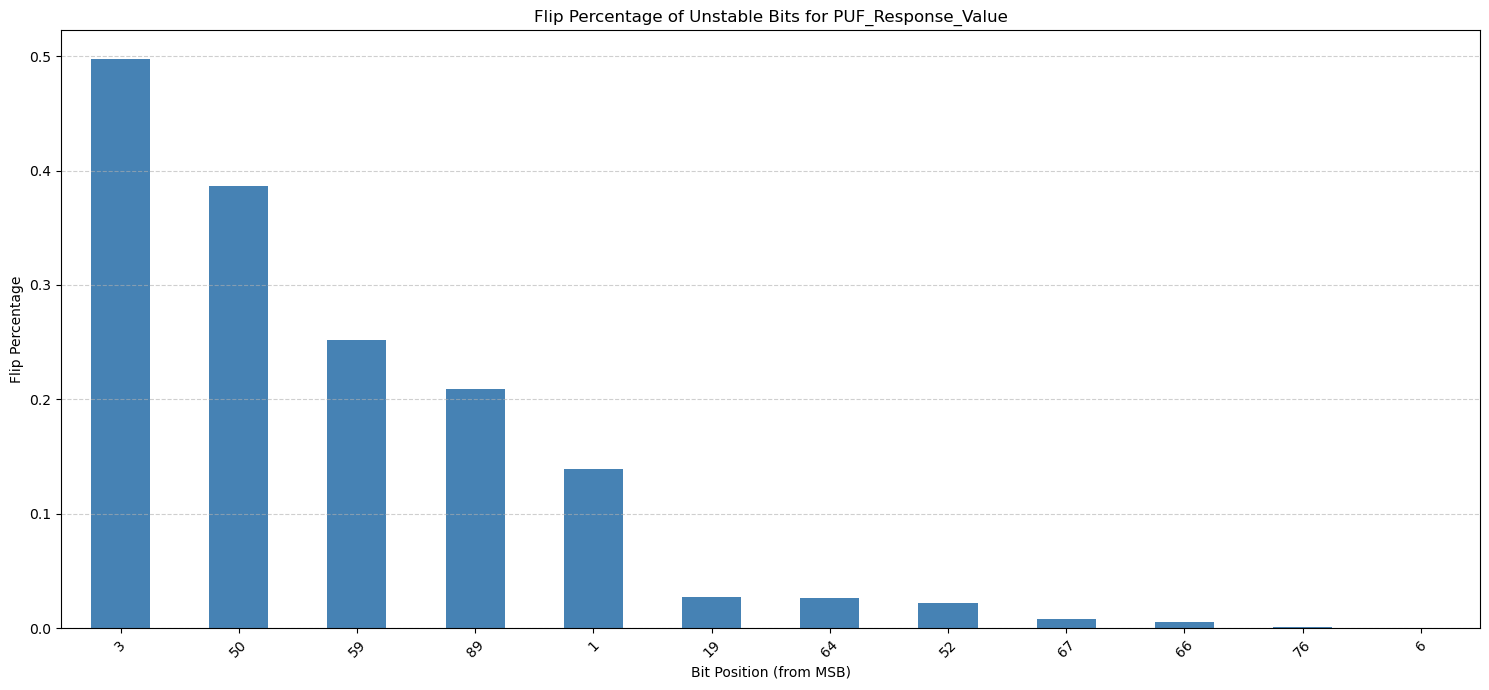

In [12]:
an.plot_unstable_bit_flips(df, puf_response_col, df_ideal_puf_response)
